Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample data
df = pd.read_csv("trimmed_coffee_shop_sales_revenue.csv", delimiter='|')

Business Understanding

In [2]:
display(df.info())

for col in df:
    print(f'{col} : {df[col].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17314 entries, 0 to 17313
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    17314 non-null  int64  
 1   transaction_date  17314 non-null  object 
 2   transaction_time  17314 non-null  object 
 3   transaction_qty   17314 non-null  int64  
 4   store_id          17314 non-null  int64  
 5   store_location    17314 non-null  object 
 6   product_id        17314 non-null  int64  
 7   unit_price        17314 non-null  float64
 8   product_category  17314 non-null  object 
 9   product_type      17314 non-null  object 
 10  product_detail    17314 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.5+ MB


None

transaction_id : [    1     2     3 ... 17341 17342 17343]
transaction_date : ['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22' '2023-01-23' '2023-01-24' '2023-01-25'
 '2023-01-26' '2023-01-27' '2023-01-28' '2023-01-29' '2023-01-30'
 '2023-01-31']
transaction_time : ['07:06:11' '07:08:56' '07:14:04' ... '19:53:46' '20:00:57' '20:01:09']
transaction_qty : [2 1 3 4 8]
store_id : [5 8 3]
store_location : ['Lower Manhattan' "Hell's Kitchen" 'Astoria']
product_id : [32 57 59 22 77 28 39 58 56 33 51 87 47 79 42 61 69 40 43 76 45 71 38 26
 27 29 54 55 24 60 78 44 48 23 46 25 34 36 74 53 41 37 50 72 35 70 73 75
 31 49 52 30 64 12 63  6  9 65 84 19  7  1 17 10  4 15 16  3 20 83 18 21
 13 11  5  2 81 14  8 82]
unit_price : [ 3.    3.1   4.5   2.    4.25  3.5 

Deskripsi Data

In [3]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,17314.000000,17314.000000,17314.000000,17314.000000,17314.000000
mean,8681.054753,1.436410,5.333718,47.894190,3.408689
std,5005.933316,0.540749,2.074895,18.035754,2.792493
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,4358.250000,1.000000,3.000000,33.000000,2.500000
50%,8686.500000,1.000000,5.000000,47.000000,3.000000
75%,13014.750000,2.000000,8.000000,60.000000,3.750000
max,17343.000000,8.000000,8.000000,87.000000,45.000000


Data Understanding
Memperlihatkan outlier pada dataset

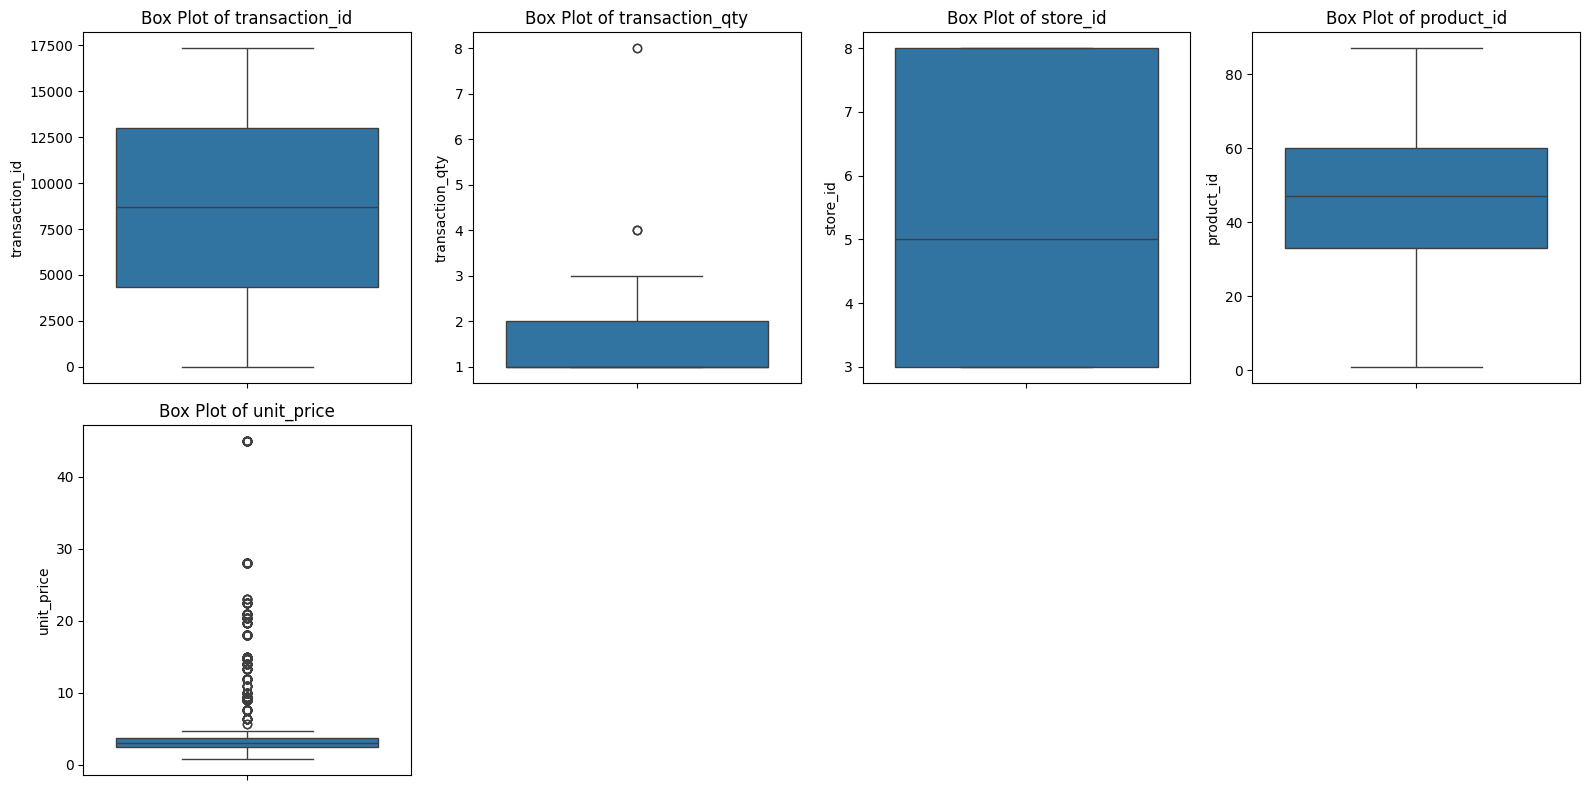

In [4]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Data Understanding
cek nilai null

In [5]:
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


Data exploration (visual aja)

Data Preperation - Data cleaning(cuma clear data yang null kalau ada)

Data preperation - Data cleaning (gausah hapus duplikasi)

In [6]:
df = df.drop_duplicates(subset=['product_category', 'store_id', 'product_id', 'transaction_qty', 'transaction_id'])

Data preperation - Transformasi data Mengubah format kolom tanggal dan waktu

In [7]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

Data preperation - Transformasi data (nambah kolom total_sales)

In [8]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']

Data preperation - Transformasi data (ubah tipe data)

In [9]:
df['transaction_qty'] = pd.to_numeric(df['transaction_qty'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

Data preperation - normalisasi

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['transaction_qty', 'unit_price', 'total_sales']] = scaler.fit_transform(df[['transaction_qty', 'unit_price', 'total_sales']])

Data preperation - outlier handling

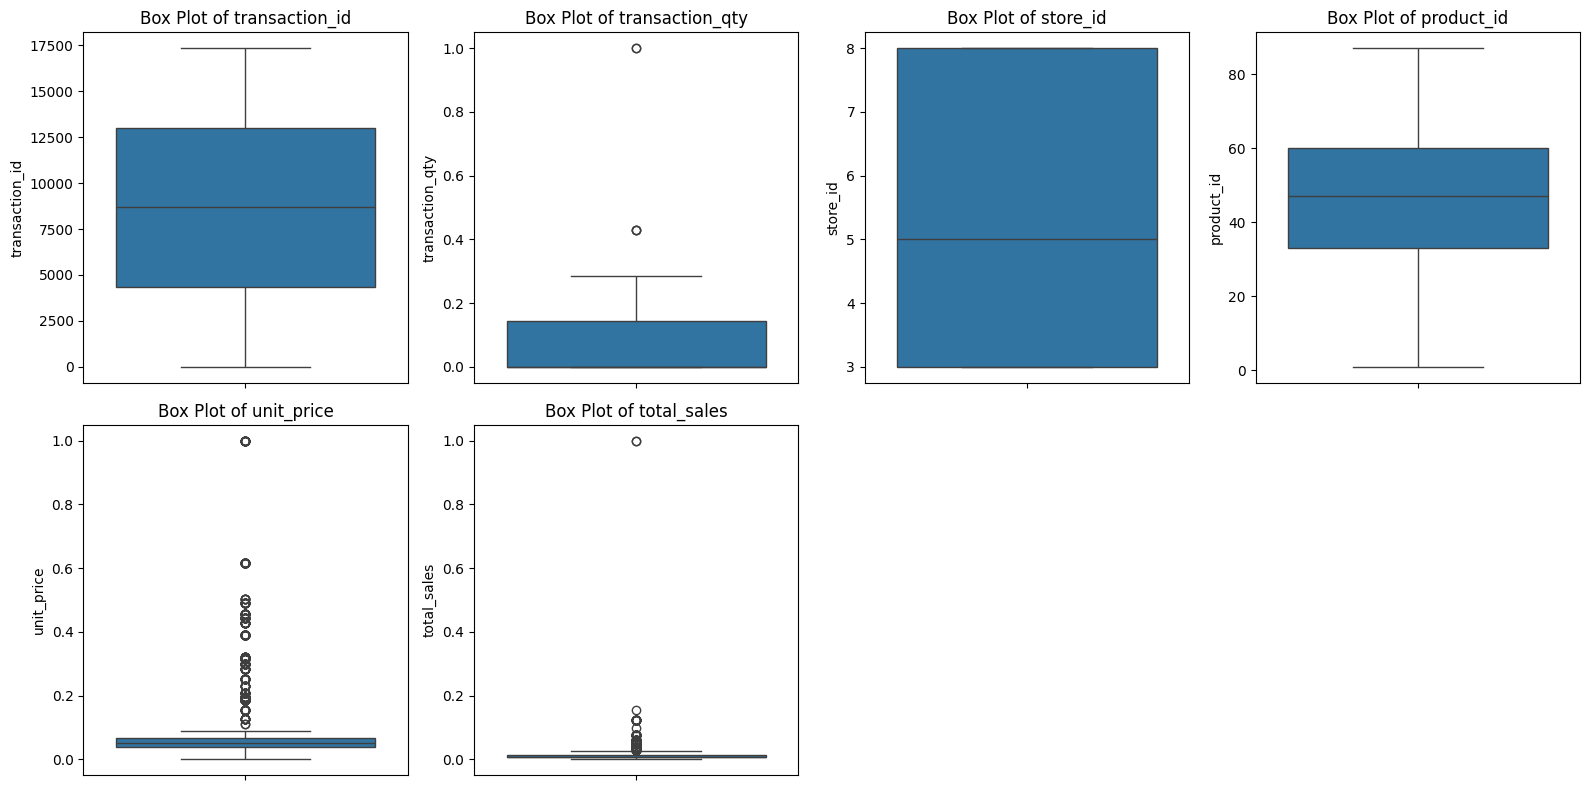

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Data preperation - visualisasi

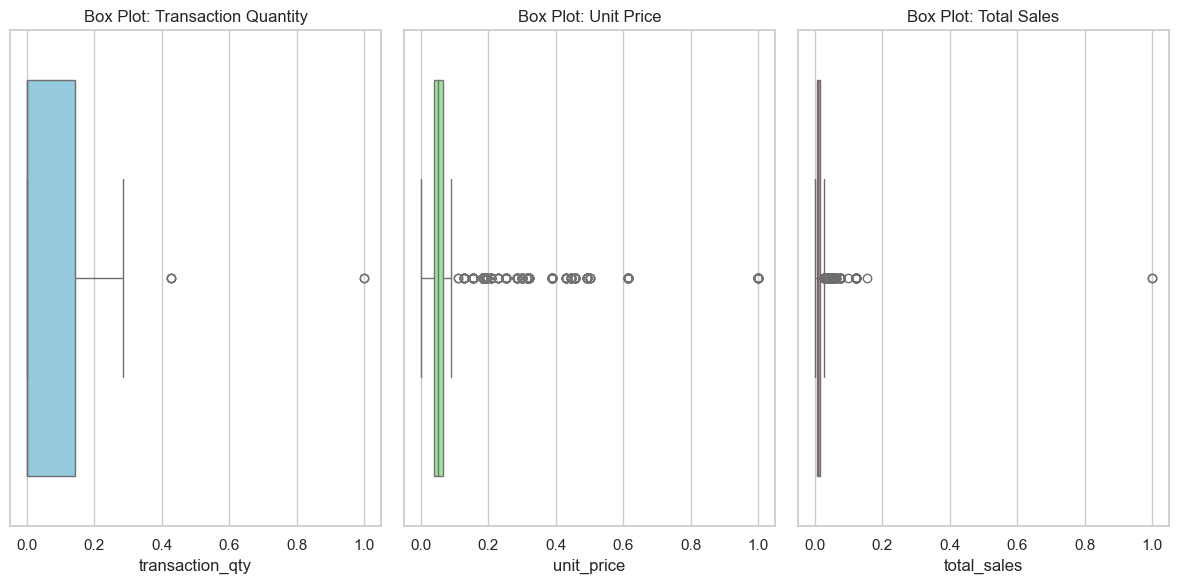

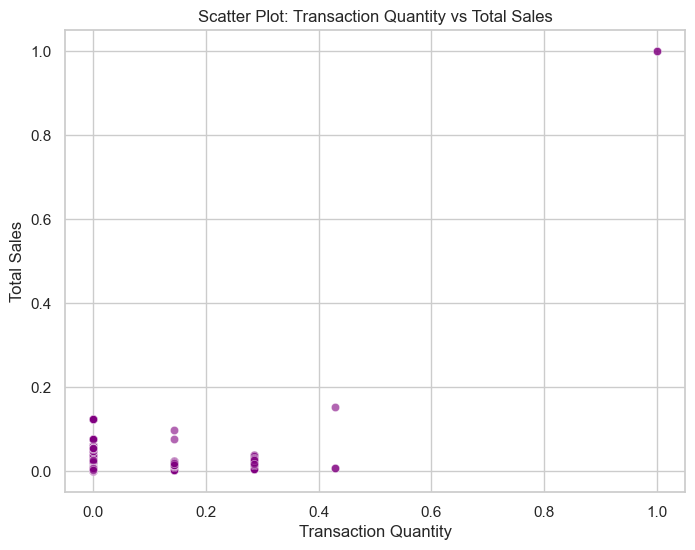

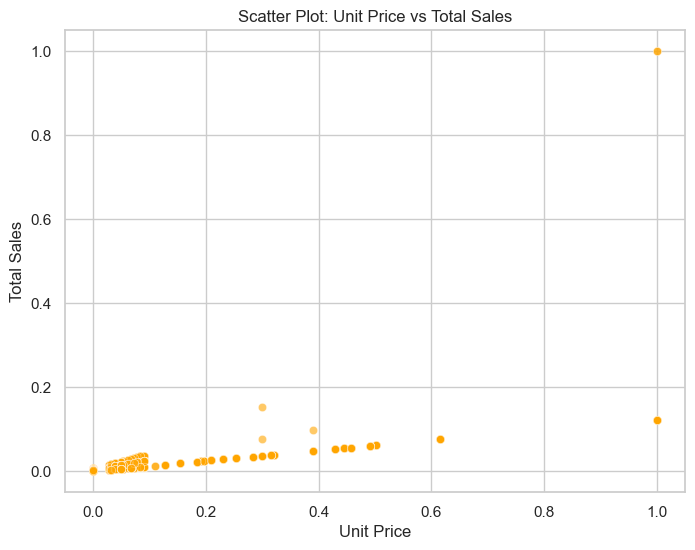

In [12]:
# Import libraries untuk visualisasi
import seaborn as sns

# Set style untuk seaborn (opsional)
sns.set(style="whitegrid")

# 1. Visualisasi Box Plot untuk kolom 'transaction_qty', 'unit_price', dan 'total_sales'
plt.figure(figsize=(12, 6))

# Box plot untuk transaction_qty
plt.subplot(1, 3, 1)
sns.boxplot(x=df['transaction_qty'], color='skyblue')
plt.title('Box Plot: Transaction Quantity')

# Box plot untuk unit_price
plt.subplot(1, 3, 2)
sns.boxplot(x=df['unit_price'], color='lightgreen')
plt.title('Box Plot: Unit Price')

# Box plot untuk total_sales
plt.subplot(1, 3, 3)
sns.boxplot(x=df['total_sales'], color='salmon')
plt.title('Box Plot: Total Sales')

plt.tight_layout()
plt.show()

# 2. Visualisasi Scatter Plot untuk hubungan antara 'transaction_qty' dan 'total_sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['transaction_qty'], y=df['total_sales'], color='purple', alpha=0.6)
plt.title('Scatter Plot: Transaction Quantity vs Total Sales')
plt.xlabel('Transaction Quantity')
plt.ylabel('Total Sales')
plt.show()

# 3. Visualisasi Scatter Plot untuk hubungan antara 'unit_price' dan 'total_sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['unit_price'], y=df['total_sales'], color='orange', alpha=0.6)
plt.title('Scatter Plot: Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()


Import library untuk modeling and evaluation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score


Splitting data
Memisahkan data untuk model regresi linear


In [14]:
X = df[['transaction_qty', 'unit_price']]  # Fitur yang digunakan
y = df['total_sales']  # Target yang ingin diprediksi


split data menjadi train dan test set (80% train, 20% test)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K-Means Clustering (untuk klasifikasi produk)
Menggunakan fitur 'transaction_qty', 'unit_price', dan 'total_sales' untuk klasterisasi produk


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Menggunakan 3 cluster sebagai contoh
df['product_cluster'] = kmeans.fit_predict(df[['transaction_qty', 'unit_price', 'total_sales']])


Menampilkan informasi tentang klaster produk


In [17]:
print("Cluster centers (Centroids of each cluster):")
print(kmeans.cluster_centers_)

Cluster centers (Centroids of each cluster):
[[8.11850587e-16 5.53441813e-02 6.81016930e-03]
 [1.49957240e-01 4.78647107e-02 1.44156101e-02]
 [8.10536981e-03 4.71550175e-01 6.45602324e-02]]


Evaluasi K-Means dengan Silhouette Score dan WCSS


In [18]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("\nSilhouette Score untuk K-Means:", silhouette_avg)



Silhouette Score untuk K-Means: 0.8214439460646158


Menghitung Within-Cluster Sum of Squares (WCSS)


In [19]:
wcss = kmeans.inertia_
print("\nWithin-Cluster Sum of Squares (WCSS):", wcss)



Within-Cluster Sum of Squares (WCSS): 31.38153133039839


Linear Regression (untuk prediksi penjualan)
Membuat dan melatih model regresi linear


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Evaluasi Regresi Linear (Prediksi Penjualan)


In [21]:
y_pred = regressor.predict(X_test)


Menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE)


In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [23]:
print("\nMean Squared Error (MSE) untuk Regresi Linear:", mse)
print("Root Mean Squared Error (RMSE) untuk Regresi Linear:", rmse)



Mean Squared Error (MSE) untuk Regresi Linear: 7.153208698531382e-06
Root Mean Squared Error (RMSE) untuk Regresi Linear: 0.0026745483167315153


Menampilkan Koefisien Model Regresi


In [24]:
print("\nKoefisien Regresi Linear:")
print(f'Intercept: {regressor.intercept_}')
print(f'Koefisien (Transaction Quantity): {regressor.coef_[0]}')
print(f'Koefisien (Unit Price): {regressor.coef_[1]}')


Koefisien Regresi Linear:
Intercept: -0.0033220040094585172
Koefisien (Transaction Quantity): 0.078716366112537
Koefisien (Unit Price): 0.15797918368489472


Daily sales Prediction

In [25]:
daily_sales_df = df.groupby('transaction_date')['total_sales'].sum().reset_index()
daily_sales_df['day_of_week'] = daily_sales_df['transaction_date'].dt.dayofweek
X_daily = daily_sales_df[['day_of_week']]
y_daily = daily_sales_df['total_sales']
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)
daily_regressor = LinearRegression()
daily_regressor.fit(X_train_daily, y_train_daily)
y_pred_daily = daily_regressor.predict(X_test_daily)
mse_daily = mean_squared_error(y_test_daily, y_pred_daily)
rmse_daily = np.sqrt(mse_daily)
print("\n--- Daily Sales Prediction Model Evaluation ---")
print("Mean Squared Error (MSE) for Daily Sales Regression:", mse_daily)
print("Root Mean Squared Error (RMSE) for Daily Sales Regression:", rmse_daily)
print("Koefisien Regresi Linear (Daily Sales - Day of Week):", daily_regressor.coef_[0])
print("Intercept (Daily Sales):", daily_regressor.intercept_)


--- Daily Sales Prediction Model Evaluation ---
Mean Squared Error (MSE) for Daily Sales Regression: 0.37704741954087956
Root Mean Squared Error (RMSE) for Daily Sales Regression: 0.6140418711626102
Koefisien Regresi Linear (Daily Sales - Day of Week): -0.018259242348488303
Intercept (Daily Sales): 6.168814382404106


Dump

In [26]:
import joblib
joblib.dump(regressor, 'regressor_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler_model.pkl')
joblib.dump(daily_regressor, 'daily_regressor_model.pkl') # Save the daily regressor model

['daily_regressor_model.pkl']

ngrok

In [27]:
!ngrok config add-authtoken 2wxQwo1M4SbwqvPMzaZSBEbVZCb_87qfHAW5EjAwpxmpZPPa5

Authtoken saved to configuration file: C:\Users\daffa\AppData\Local/ngrok/ngrok.yml


Dashboard

In [37]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import datetime
import io
import plotly.express as px

st.set_page_config(layout="wide") # Gunakan layout lebar untuk tampilan yang lebih baik

st.title('Dashboard Klasifikasi Produk dan Prediksi Penjualan Harian Maven Roasters Coffee')

# --- Muat Model dan Data ---
st.header("1. Muat Model dan Data")

# Muat model
try:
    kmeans = joblib.load('kmeans_model.pkl')
    scaler = joblib.load('scaler_model.pkl')
    daily_regressor = joblib.load('daily_regressor_model.pkl')
    st.success("Semua model machine learning berhasil dimuat!")
except FileNotFoundError:
    st.error("File model tidak ditemukan. Pastikan 'kmeans_model.pkl', 'scaler_model.pkl', dan 'daily_regressor_model.pkl' berada di direktori yang sama.")
    st.stop() # Hentikan eksekusi jika model tidak ditemukan

# Muat dataset secara langsung (tidak perlu upload)
try:
    df_raw = pd.read_csv("trimmed_coffee_shop_sales_revenue.csv", delimiter='|')
    st.success("Dataset 'trimmed_coffee_shop_sales_revenue.csv' berhasil dimuat!")
except FileNotFoundError:
    st.error("Dataset 'trimmed_coffee_shop_sales_revenue.csv' tidak ditemukan. Pastikan berada di direktori yang sama.")
    st.stop()

# --- Pra-pemrosesan Data (Ringan) ---
st.header("2. Pra-pemrosesan Data (Ringan)")
df_processed = df_raw.copy()
df_processed['transaction_date'] = pd.to_datetime(df_processed['transaction_date'], format='%Y-%m-%d')
df_processed['transaction_time'] = pd.to_datetime(df_processed['transaction_time'], format='%H:%M:%S').dt.time
df_processed['total_sales'] = df_processed['transaction_qty'] * df_processed['unit_price']

# Terapkan scaler yang sudah dilatih sebelumnya. Pastikan kolom cocok dengan data pelatihan.
numerical_cols_for_scaling = ['transaction_qty', 'unit_price', 'total_sales']
# Periksa apakah kolom-kolom ini ada sebelum scaling
if all(col in df_processed.columns for col in numerical_cols_for_scaling):
    # Pastikan kolom-kolomnya numerik sebelum scaling (penting untuk scaling yang robust)
    for col in numerical_cols_for_scaling:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

    # Buat salinan df_processed sebelum scaling untuk inverse transform nanti jika diperlukan
    df_original_scale_for_inverse = df_processed[numerical_cols_for_scaling].copy()

    df_processed[numerical_cols_for_scaling] = scaler.transform(df_processed[numerical_cols_for_scaling])
else:
    st.warning("Tidak dapat melakukan pra-pemrosesan penuh: Kolom numerik yang diperlukan untuk scaling tidak ditemukan.")


st.write("Data telah dipra-proses (konversi tanggal/waktu, perhitungan total_sales, dan normalisasi diterapkan).")
st.write("5 baris pertama data yang diproses:")
st.dataframe(df_processed.head())

# --- Informasi Dataset ---
st.header("3. Informasi Dataset")

st.subheader("Head DataFrame")
st.dataframe(df_raw.head())

st.subheader("Info DataFrame")
buffer = io.StringIO()
df_raw.info(buf=buffer)
s = buffer.getvalue()
st.text(s)

st.subheader("Deskripsi Data (Kolom Numerik)")
st.dataframe(df_raw.describe())

# --- Hasil K-Means Clustering ---
st.header("4. Hasil K-Means Clustering")

st.markdown(
    """
    K-Means Clustering adalah algoritma pembelajaran tanpa pengawasan yang mengelompokkan
    titik data ke dalam sejumlah klaster berdasarkan kesamaan fitur. Dalam kasus ini, kami telah
    mengelompokkan produk-produk Maven Roasters Coffee berdasarkan
    **Jumlah Transaksi**, **Harga Per Unit**, dan **Total Penjualan** dari setiap transaksi.
    Tujuan dari klasterisasi ini adalah untuk mengidentifikasi segmen-segmen produk yang berbeda
    berdasarkan perilaku penjualan mereka.
    """
)

kmeans_features = ['transaction_qty', 'unit_price', 'total_sales']
if all(col in df_processed.columns for col in kmeans_features):
    df_processed['product_cluster'] = kmeans.predict(df_processed[kmeans_features])

    st.subheader("Pusat Klaster (Centroid setiap klaster - nilai ternormalisasi):")
    st.write("Nilai-nilai ini menunjukkan rata-rata fitur untuk setiap klaster setelah proses normalisasi (skala 0-1).")

    # Membuat DataFrame untuk centroid
    centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=kmeans_features)
    # Ubah nama kolom indeks (0, 1, 2) menjadi nama yang lebih deskriptif
    centroid_df.index.name = 'ID Klaster'
    st.dataframe(centroid_df.style.format("{:.4f}")) # Format tampilan agar lebih rapi

    st.subheader("Interpretasi Klaster:")
    st.markdown(
        """
        Berdasarkan analisis nilai centroid yang telah dinormalisasi:

        * **Klaster 0: 'Produk Kurang Populer, Penjualan Rendah'**:
            Produk-produk dalam klaster ini memiliki **jumlah transaksi rata-rata yang sangat rendah**,
            **harga per unit rata-rata yang sedang-sedang saja**, dan **total penjualan rata-rata yang juga sangat rendah**.
            Ini mengindikasikan produk yang mungkin kurang diminati atau hanya dibeli sesekali.
        * **Klaster 1: 'Produk Populer, Harga Standar'**:
            Klaster ini berisi produk-produk dengan **jumlah transaksi rata-rata tertinggi**
            namun dengan **harga per unit rata-rata yang relatif standar/menengah**, dan **total penjualan rata-rata yang lebih tinggi dari Klaster 0**.
            Produk-produk ini bisa jadi adalah yang paling sering dibeli dalam jumlah banyak oleh pelanggan.
        * **Klaster 2: 'Produk Premium, Penjualan Tinggi'**:
            Produk di klaster ini memiliki **jumlah transaksi rata-rata yang rendah** (namun tidak serendah Klaster 0),
            **harga per unit rata-rata yang sangat tinggi**, dan menghasilkan **total penjualan rata-rata yang juga sangat tinggi**.
            Ini menunjukkan produk-produk yang mungkin mahal namun bernilai tinggi, dibeli lebih jarang namun memberikan kontribusi besar pada pendapatan per unit.
        """
    )
    st.caption("Catatan: Interpretasi klaster bersifat perkiraan dan dapat disempurnakan dengan analisis lebih lanjut pada kategori/tipe produk asli.")


    st.subheader("Distribusi Produk per Klaster:")
    st.write("Tabel ini menunjukkan berapa banyak produk yang telah ditetapkan ke setiap klaster.")
    cluster_counts = df_processed['product_cluster'].value_counts().reset_index()
    cluster_counts.columns = ['ID Klaster', 'Jumlah Produk'] # Mengubah nama kolom
    st.dataframe(cluster_counts)

    st.subheader("Visualisasi Klaster Produk:")
    st.write("Visualisasi ini menunjukkan bagaimana produk-produk tersebar di setiap klaster berdasarkan fitur 'transaction_qty' dan 'total_sales'.")
    # Menggunakan df_processed yang sudah memiliki kolom 'product_cluster'
    fig_scatter = px.scatter(df_processed,
                             x='transaction_qty',
                             y='total_sales',
                             color='product_cluster', # Warna berdasarkan klaster
                             title='Sebaran Klaster Produk',
                             labels={'transaction_qty': 'Jumlah Transaksi (Normalisasi)',
                                     'total_sales': 'Total Penjualan (Normalisasi)'},
                             hover_name='product_cluster' # Menampilkan ID klaster saat di-hover
                            )
    st.plotly_chart(fig_scatter, use_container_width=True)

    # --- Bagian Baru: Detail Produk per Klaster ---
    st.subheader("Detail Produk per Klaster (Eksplorasi)")
    st.write("Pilih ID Klaster untuk melihat detail produk yang termasuk di dalamnya, serta distribusi kategori dan tipe produknya.")

    selected_cluster_id = st.selectbox('Pilih Klaster ID untuk Detail:', options=sorted(df_processed['product_cluster'].unique()))

    # Filter df_processed berdasarkan klaster yang dipilih
    df_cluster_detail_processed = df_processed[df_processed['product_cluster'] == selected_cluster_id]

    # Gabungkan kembali dengan df_raw untuk mendapatkan detail produk asli (non-normalisasi)
    # Ini penting karena df_processed sudah ternormalisasi, jadi product_category dll akan tetap asli.
    df_display_detail = df_raw.loc[df_cluster_detail_processed.index].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning
    df_display_detail['product_cluster'] = df_cluster_detail_processed['product_cluster'] # Tambahkan kembali kolom klaster

    st.write(f"**5 Baris Pertama Produk dalam Klaster {selected_cluster_id}:**")
    st.dataframe(df_display_detail.head())

    st.write(f"**Distribusi Kategori Produk dalam Klaster {selected_cluster_id}:**")
    st.dataframe(df_display_detail['product_category'].value_counts().reset_index().rename(columns={'index': 'Kategori Produk', 'product_category': 'Jumlah'}))

    st.write(f"**Distribusi Tipe Produk dalam Klaster {selected_cluster_id} (5 Teratas):**")
    st.dataframe(df_display_detail['product_type'].value_counts().head(5).reset_index().rename(columns={'index': 'Tipe Produk', 'product_type': 'Jumlah'}))

    st.write(f"**Distribusi Detail Produk dalam Klaster {selected_cluster_id} (5 Teratas):**")
    st.dataframe(df_display_detail['product_detail'].value_counts().head(5).reset_index().rename(columns={'index': 'Detail Produk', 'product_detail': 'Jumlah'}))

else:
    st.warning("Tidak dapat menampilkan hasil K-Means clustering: Kolom yang diperlukan tidak ditemukan dalam data yang diproses.")


# --- Prediksi Penjualan Harian ---
st.header("5. Prediksi Penjualan Harian")
st.write("Prediksi total penjualan untuk hari tertentu dalam seminggu.")

# Opsi untuk hari dalam seminggu (Senin=0, Minggu=6)
day_names = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
day_of_week_input = st.selectbox('Pilih Hari dalam Seminggu:', options=list(range(7)), format_func=lambda x: day_names[x])

if st.button('Prediksi Penjualan Harian'):

    # Pastikan data untuk inverse_transform adalah numpy array dengan bentuk yang benar
    # dan hanya kolom 'total_sales' yang diisi dengan nilai prediksi.
    predicted_daily_sales_normalized = daily_regressor.predict(np.array([[day_of_week_input]]))[0]

    # Buat array dummy dengan nol, lalu masukkan nilai prediksi pada indeks kolom 'total_sales'
    # Ini memastikan bahwa inverse_transform hanya membalikkan skala kolom yang relevan.
    dummy_inverse_transform_array_daily = np.zeros((1, len(numerical_cols_for_scaling)))

    # Dapatkan indeks kolom 'total_sales'
    total_sales_col_index = numerical_cols_for_scaling.index('total_sales')
    dummy_inverse_transform_array_daily[0, total_sales_col_index] = predicted_daily_sales_normalized

    # Lakukan inverse_transform dan ambil nilai 'total_sales' yang sudah dikembalikan skalanya
    predicted_daily_sales_original_scale = scaler.inverse_transform(dummy_inverse_transform_array_daily)[0, total_sales_col_index]

    st.success(f'Prediksi Total Penjualan Harian untuk hari {day_names[day_of_week_input]} adalah: ${predicted_daily_sales_original_scale:.2f}')

Overwriting app.py


In [38]:
from pyngrok import ngrok
import threading
import time
import os

In [39]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://4928-114-10-45-98.ngrok-free.app" -> "http://localhost:8501"
